# Import Library

In [5]:
import os
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import splitfolders

# Pengambilan Dataset

In [6]:
# base_dir = '\capstone\Dataset'
base_dir = r"D:\Unmul\Bangkit\Capstone\Model\Bangkit-main\Model 2\Dataset"

Split data

In [7]:
splitfolders.ratio(
    base_dir,
    output='fixDataset',
    ratio=(.8,0.1, 0.1)
)

Copying files: 2302 files [00:11, 197.77 files/s]


In [8]:
train_dir = 'fixDataset/train/'
val_dir = 'fixDataset/val/'
val_dir = 'fixDataset/test/'
os.listdir(train_dir)

['Alat Musik', 'Random']

# Augmentasi Gambar

In [9]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=0.45,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    brightness_range=(0.5,1.0), 
                    shear_range=0.2, 
                    zoom_range=(0.8,1.0), 
                    fill_mode='nearest', 
                    horizontal_flip=True
                    )
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(150,150), # mengubah resolusi seluruh gambar jadi 150*150
    batch_size=32,# untuk menentukan jumlah image yang akan dimasukkan ke dalam steps training
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 1841 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Found 231 images belonging to 2 classes.


In [11]:
image, label = train_generator.next()

In [12]:
class_name = os.listdir(train_dir)

In [13]:
class_name

['Alat Musik', 'Random']

# Transfer Learning

In [14]:
from keras.callbacks import EarlyStopping

monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=3)

In [15]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    patience= 2,
    verbose= 1,
    factor=0.3,
    min_lr=0.000001
)

In [16]:
from tensorflow.keras.applications import InceptionV3
model = InceptionV3(weights = 'imagenet',
                    include_top=False,
                    input_shape=(150,150,3))
model.trainable = False

In [17]:
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications

In [18]:
add_model = Sequential()
add_model.add(model)
add_model.add(Flatten())
add_model.add(tf.keras.layers.Dense(1024, activation='relu'))
add_model.add(tf.keras.layers.Dense(512, activation='relu'))
add_model.add(Dropout(0.5))
add_model.add(Dense(2, activation='softmax'))

model = add_model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 1024)              18875392  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 41,204,002
Trainable params: 19,401,218
No

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
history = model.fit(train_generator,
                    epochs=15,
                    shuffle=True,
                    verbose=True,
                    validation_data=val_generator,
                    callbacks=[reduce_lr,monitor_val_acc])

Epoch 1/15
58/58 [==============================] - 56s 885ms/step - loss: 0.4902 - accuracy: 0.8707 - val_loss: 0.0742 - val_accuracy: 0.9784 - lr: 1.0000e-04
Epoch 2/15
58/58 [==============================] - 40s 680ms/step - loss: 0.1512 - accuracy: 0.9555 - val_loss: 0.0451 - val_accuracy: 0.9827 - lr: 1.0000e-04
Epoch 3/15
58/58 [==============================] - 39s 668ms/step - loss: 0.1316 - accuracy: 0.9620 - val_loss: 0.2685 - val_accuracy: 0.9394 - lr: 1.0000e-04
Epoch 4/15
58/58 [==============================] - 39s 673ms/step - loss: 0.0941 - accuracy: 0.9701 - val_loss: 0.0441 - val_accuracy: 0.9913 - lr: 1.0000e-04
Epoch 5/15
58/58 [==============================] - 38s 659ms/step - loss: 0.0599 - accuracy: 0.9783 - val_loss: 0.0962 - val_accuracy: 0.9740 - lr: 1.0000e-04
Epoch 6/15
58/58 [==============================] - ETA: 0s - loss: 0.0510 - accuracy: 0.9815
Epoch 6: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
58/58 [======================

Lihat Hasil Evaluasi Accuracy dan Loss

In [20]:
test_loss, test_acc = model.evaluate(test_generator)
print("loss:", test_loss)
print("acc:", test_acc)

8/8 [==============================] - 4s 497ms/step - loss: 0.0565 - accuracy: 0.9870
loss: 0.056464456021785736
acc: 0.9870129823684692


Save Model

In [21]:
add_model.save('Model2.h5')

# Visualisasi

Akurasi Train & Validation

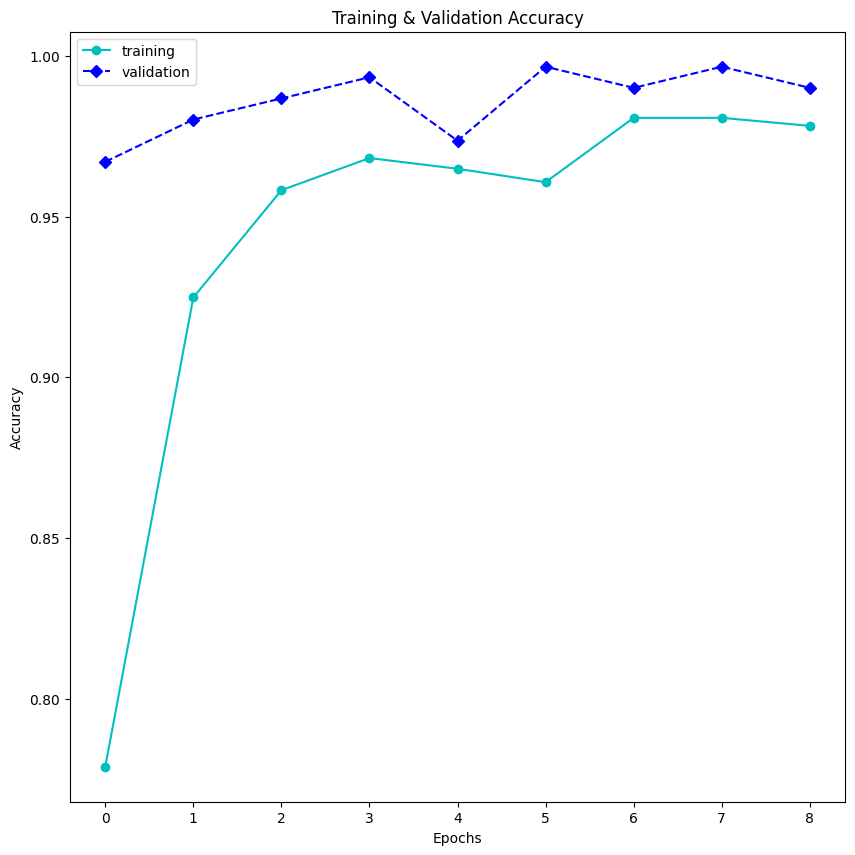

In [14]:
plt.figure(1, figsize=(10, 10))
plt.plot(range(len(history.history['accuracy'])),
         history.history['accuracy'],
         'co-',
         label='training')
plt.plot(
    range(len(history.history['val_accuracy'])),
    history.history['val_accuracy'],
    'bD--',
    label='validation'
)
plt.title('Training & Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Visualisasi Loss Train & Val

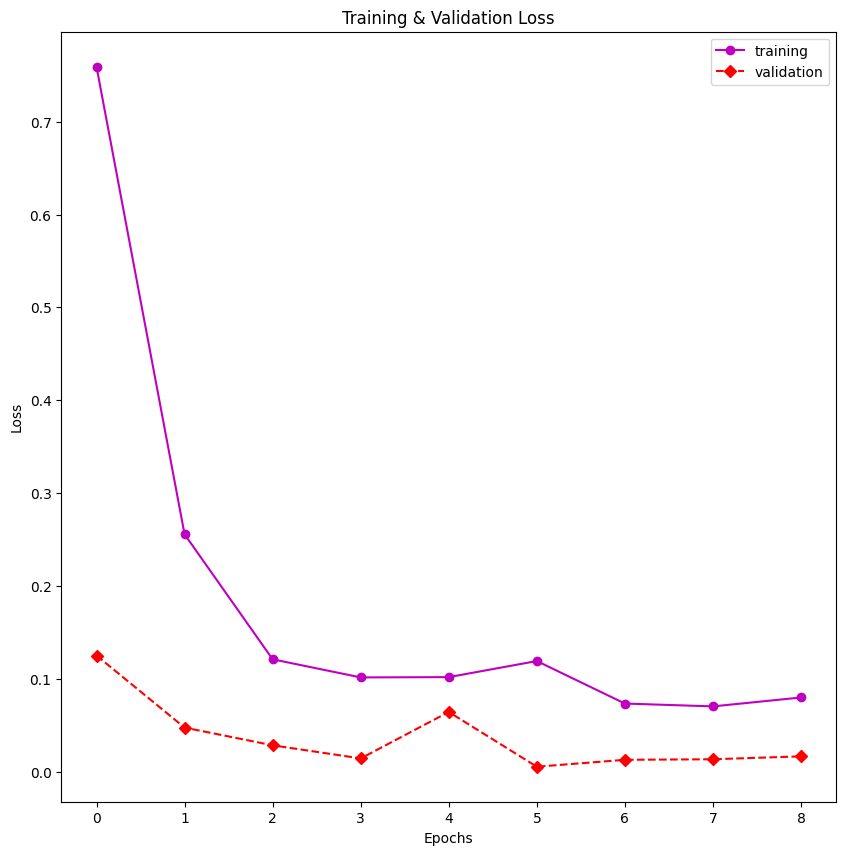

In [15]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['loss'])), 
         history.history['loss'],
         'mo-',
         label='training')
plt.plot(range(len(history.history['val_loss'])), 
         history.history['val_loss'],
         'rD--',
         label='validation')
plt.title('Training & Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Gambar berdasarkan Label

In [16]:
import numpy as np

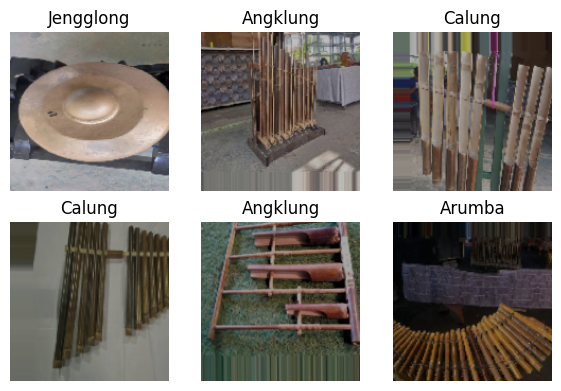

In [17]:
plt.figure(figsize=(7,7))
for i in range(6):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[i])
  plt.title(class_name[np.argmax(label[i])])
  plt.axis("off")

1/1 [==============================] - 0s 84ms/step
C:/capstone/Testing/arumba3.jpeg
Arumba


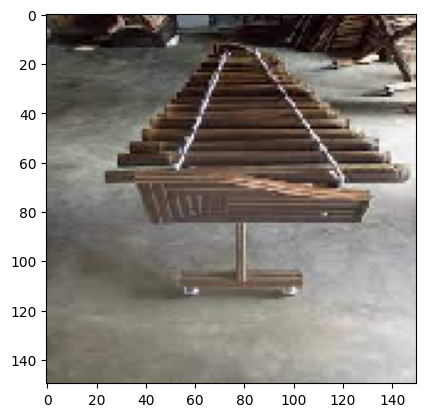

In [42]:
import tkinter as tk
from tkinter import filedialog
from keras.preprocessing import image
import numpy as np

root = tk.Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
filename = filedialog.askopenfilename()
%gui tk

img = tf.keras.utils.load_img(filename, target_size=(150, 150))
imgplot = plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=32)

print(filename)
if classes[0][0] == 1:
  print('Angklung')
elif classes[0][1] == 1:
  print('Arumba')
elif classes[0][2] == 1:
  print('Calung')
elif classes[0][3] == 1:
  print('Jengglong')
else:
  print('Kendang')